# TP 2 Exo 2 : Gradient, filtrage et morphologie
Dans ce TP, nous aimerions appliquer une analyse d'image en efféctuant:
- un calcul basique de gradient horizontal et vertical,
- un calcul du module et de l'orientation du gradient,
- un calcul du gradient en utilisant une convolution avec les filtres Sobel et Prewitt,
- un calcul du Laplacien du Gaussien (dérivée seconde de l'image)
- un filtrage de l'image avec un filtre médian, gaussien et un filtre moyen et comparer la difference,
- un seuillage de l'image,
- des morphologies mathématiques (dilatation et érosion),
L'objectif est d'observer le résultat pour chaque opération et de comparer les differentes méthodes.

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

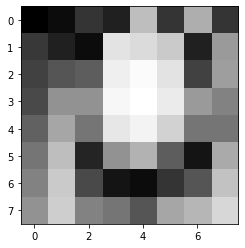

In [4]:
# lecture de l'image
image = np.array([[0, 12, 53, 32, 190, 53, 174, 53],
                  [57, 32, 12, 227, 219, 202, 32, 154],
                  [65, 85, 93, 239, 251, 227, 65, 158],
                  [73, 146, 146, 247, 255, 235, 154, 130],
                  [97, 166, 117, 231, 243, 210, 117, 117],
                  [117, 190, 36, 146, 178, 93, 20, 170],
                  [130, 202, 73, 20, 12, 53, 85, 194], 
                  [146, 206, 130, 117, 85, 166, 182, 215] ])

plt.imshow(image, cmap='gray')

# Calcul du gradient de l'image

Définir d'abord une fonction de convolution  
**Astuce**: pour ajouter du padding il est possible d'utiliser la fonction cv.copyMakeBorder

[[  57.   20.  -41.  195.   29.  149. -142.  101.]
 [   8.   53.   81.   12.   32.   25.   33.    4.]
 [   8.   61.   53.    8.    4.    8.   89.  -28.]
 [  24.   20.  -29.  -16.  -12.  -25.  -37.  -13.]
 [  20.   24.  -81.  -85.  -65. -117.  -97.   53.]
 [  13.   12.   37. -126. -166.  -40.   65.   24.]
 [  16.    4.   57.   97.   73.  113.   97.   21.]
 [-146. -206. -130. -117.  -85. -166. -182. -215.]]


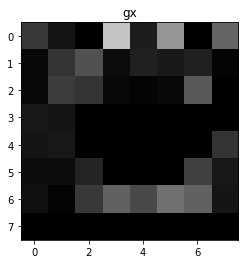

[[  12.   41.  -21.  158. -137.  121. -121.  -53.]
 [ -25.  -20.  215.   -8.  -17. -170.  122. -154.]
 [  20.    8.  146.   12.  -24. -162.   93. -158.]
 [  73.    0.  101.    8.  -20.  -81.  -24. -130.]
 [  69.  -49.  114.   12.  -33.  -93.    0. -117.]
 [  73. -154.  110.   32.  -85.  -73.  150. -170.]
 [  72. -129.  -53.   -8.   41.   32.  109. -194.]
 [  60.  -76.  -13.  -32.   81.   16.   33. -215.]]


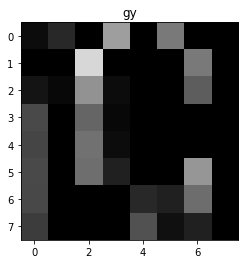

In [13]:
height = image.shape[0]
width = image.shape[1]

gx = np.zeros((height, width))
gy = np.zeros((height, width))

matrix = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, None, value=0)

for i in range(1, height+1):
  for j in range(1, width+1):
    gx[i-1][j-1] = matrix[i+1][j] - matrix[i][j]
    gy[i-1][j-1] = matrix[i][j+1] - matrix[i][j]

print(gx)
plt.title("gx")
plt.imshow(gx, cmap='gray')
plt.clim(0, 256)
plt.show()

print(gy)
plt.title("gy")
plt.imshow(gy, cmap='gray')
plt.clim(0, 256)
plt.show()

Magnitude du Gradient $Mod(G(i,j)) = \sqrt{(G_x(i,j)^2+G_y(j,j)^2} $

In [18]:
magnitudes = np.zeros((height, width))
magnitudes = np.sqrt((gx ** 2) + (gy ** 2))

np.set_printoptions(precision=3)
print(magnitudes)

[[ 58.249  45.618  46.065 250.976 140.036 191.943 186.561 114.061]
 [ 26.249  56.648 229.752  14.422  36.235 171.828 126.384 154.052]
 [ 21.541  61.522 155.322  14.422  24.331 162.197 128.725 160.462]
 [ 76.844  20.    105.081  17.889  23.324  84.77   44.102 130.648]
 [ 71.84   54.562 139.846  85.843  72.897 149.459  97.    128.445]
 [ 74.148 154.467 116.056 130.    186.497  83.241 163.478 171.686]
 [ 73.756 129.062  77.833  97.329  83.726 117.444 145.911 195.133]
 [157.848 219.572 130.648 121.297 117.414 166.769 184.968 304.056]]


Orientation du gradient $\theta = tan^{-1}\left( \frac{G_y(i,j) }{G_x(j,j)}\right) $  
**Astuce** Il est possible d'utiliser la fonction np.arctan2, mais elle retourne les valeurs en radians. Il est possible de les convertir en degrees soit manuellement, soit en utilisant math.degrees

In [19]:
orientations = np.degrees(np.arctan(gy / gx))
print(orientations)

[[ 11.889  63.997  27.121  39.016 -78.048  39.079  40.435 -27.688]
 [-72.255 -20.674  69.356 -33.69  -27.979 -81.634  74.864 -88.512]
 [ 68.199   7.472  70.048  56.31  -80.538 -87.173  46.259  79.951]
 [ 71.801   0.    -73.98  -26.565  59.036  72.848  32.969  84.289]
 [ 73.836 -63.905 -54.605  -8.036  26.917  38.48   -0.    -65.63 ]
 [ 79.902 -85.544  71.409 -14.25   27.115  61.28   66.571 -81.964]
 [ 77.471 -88.224 -42.917  -4.715  29.32   15.811  48.334 -83.822]
 [-22.341  20.251   5.711  15.297 -43.62   -5.505 -10.277  45.   ]]


# Binarisation de l'image  
D'abord binariser l'image en fonction de la magnitude comme vu en TD (G(i,j)>70)  
Ensuite binariser en fonction du niveau de gris (I(x,y)>70)  
Observer la difference entre les deux résultats.

using magnitude: 
[[0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 1. 0. 0. 1. 1. 1.]
 [0. 0. 1. 0. 0. 1. 1. 1.]
 [1. 0. 1. 0. 0. 1. 0. 1.]
 [1. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]


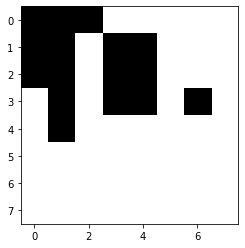


using grayscale: 
[[0 0 0 0 1 0 1 0]
 [0 0 0 1 1 1 0 1]
 [0 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 0 1 1 1 0 1]
 [1 1 1 0 0 0 1 1]
 [1 1 1 1 1 1 1 1]]


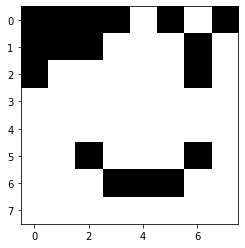

In [27]:
_, binary = cv2.threshold(magnitudes, 70, 1, cv2.THRESH_BINARY)
_, binary_2 = cv2.threshold(np.asarray(image).astype('uint8'), 70, 1, cv2.THRESH_BINARY)

print("using magnitude: ")
print(binary)
plt.imshow(binary, cmap='gray')
plt.show()

print("\nusing grayscale: ")
print(binary_2)
plt.imshow(binary_2, cmap='gray')
plt.show()

# Qu'obtient-on  de chaque binarisation?

Binarizing the image using the magnitudes allows us to isolate out the edges of the shapes that are in the image

On the other hand, binarizing the image using the grayscale only displays the bright parts of the image

# Dilatation avec un élement structurant de type diamond

[[0. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]


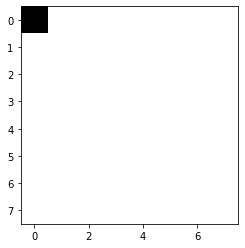

In [31]:
dilation = np.array(binary, copy=True)
expand=1
for i in range(1,height-1):
  for j in range(1,width-1):
    expand = 1
    if(not binary[i][j] and not binary[i-1][j] and not binary[i][j-1] and not binary[i][j+1] and not binary[i+1][j]): expand = 0
  
    dilation[i][j] = expand
    dilation[i-1][j] = expand
    dilation[i][j-1] = expand
    dilation[i][j+1] = expand
    dilation[i+1][j] = expand

print(dilation)
plt.imshow(dilation, cmap='gray')

# Erosion avec un élément structurant de type carré 

[[0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]


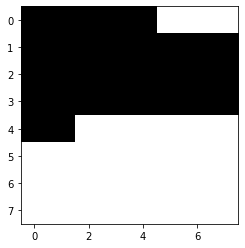

In [32]:
erosion=np.array(binary, copy=True)
erode=0
for i in range(1,height-1):
  for j in range(1,width-1):
    erode = 0
    if(binary[i-1][j-1] and binary[i-1][j] and binary[i-1][j+1] 
      and binary[i][j-1] and binary[i][j] and binary[i][j+1] 
      and binary[i+1][j-1] and binary[i+1][j] and binary[i+1][j+1]):
      erode = 1
    
    erosion[i-1][j-1]=erode
    erosion[i-1][j]=erode
    erosion[i-1][j+1]=erode
    erosion[i][j-1]=erode
    erosion[i][j]=erode
    erosion[i][j+1]=erode
    erosion[i+1][j-1]=erode
    erosion[i+1][j]=erode
    erosion[i+1][j+1]=erode

print(erosion)
plt.imshow(erosion, cmap='gray')

# Erosion avec un élément structurant de type carré 

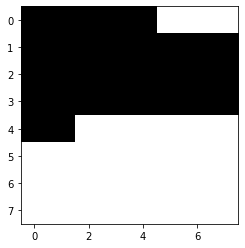

In [ ]:
EImage = BImage.copy()
EKernal = np.ones((3,3))
for x in range(1,len(BImage)-1) :
    for y in range(1,len(BImage[x])-1) :
        arr = BImage[x-1:x+2,y-1:y+2]
        ero = 1
        for i in range(3) :
            for j in range(3) :
                   ero = int(arr[i][j]) and int(EKernal[i][j]) and ero
        EImage[x-1:x+2,y-1:y+2] = ero
plt.imshow(EImage,cmap='gray')

# Dérivé avec filtres Prewitt et Sobel

In [35]:
def convolution(img, filter):
  height = img.shape[0]
  width = img.shape[1]
  padded = cv2.copyMakeBorder(img, 1, 1, 1, 1, cv2.BORDER_CONSTANT, None, value=0)

  result = np.zeros([height, width])
  for i in range(1, height + 1):
    for j in range(1, width + 1):
      result[i-1][j-1] = padded[i-1][j-1] * filter[0][0]
      result[i-1][j-1] += padded[i-1][j] * filter[0][1]
      result[i-1][j-1] += padded[i-1][j+1] * filter[0][2]
      result[i-1][j-1] += padded[i][j-1] * filter[1][0]
      result[i-1][j-1] += padded[i][j] * filter[1][1]
      result[i-1][j-1] += padded[i][j+1] * filter[1][2]
      result[i-1][j-1] += padded[i+1][j-1] * filter[2][0]
      result[i-1][j-1] += padded[i+1][j] * filter[2][1]
      result[i-1][j-1] += padded[i+1][j+1] * filter[2][2]

  print(result)
  plt.imshow(result, cmap='gray')
  plt.clim(0, 256)
  plt.show()
  return result

Prewitt X:
[[  44.    8.  215.  344.   -4. -203.  -48. -206.]
 [ 129.   36.  369.  502.  -16. -389. -117. -271.]
 [ 263.   56.  450.  474.  -49. -474. -222. -251.]
 [ 397.  121.  320.  393.  -45. -413. -267. -336.]
 [ 502.   12.  122.  377.  -86. -385. -121. -291.]
 [ 558. -118. -161.  207.  -41. -211.  125. -222.]
 [ 598. -154. -315.   36.   29.   12.  267. -287.]
 [ 408.  -73. -271. -106.   82.  170.  190. -267.]]


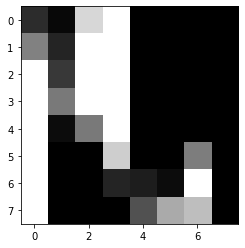


Prewitt Y
[[  89.  101.  271.  458.  648.  453.  388.  186.]
 [ 138.  178.  320.  308.  442.  126.  170.   -4.]
 [ 130.  264.  268.  190.   89.  191.  131.   98.]
 [ 113.  137.   97.    8.  -33.   27.   -6.   11.]
 [  88.  -22. -167. -288. -320. -353. -236.  -94.]
 [  69.   25. -219. -486. -599. -420. -112.   45.]
 [  45.  139.   81.  -28.  -49.  142.  280.  207.]
 [-332. -405. -295. -105.  -85. -150. -332. -279.]]


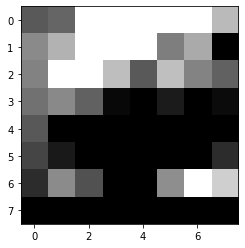


Sobel X:
[[  56.   61.  235.  481.   17. -219.  -48. -380.]
 [ 161.   -9.  564.  709.  -41. -576. -165. -303.]
 [ 348.   84.  604.  632.  -61. -660. -291. -316.]
 [ 543.  194.  421.  502.  -57. -514. -372. -490.]
 [ 668.   32.  187.  503. -107. -511. -214. -408.]
 [ 748. -199. -205.  349.  -94. -369.  202. -242.]
 [ 800. -211. -497.  -25.   62.   85.  408. -372.]
 [ 614.  -89. -360. -151.  131.  267.  239. -449.]]


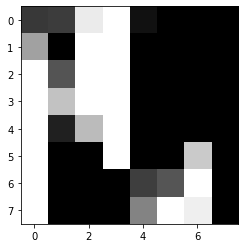


Sobel Y:
[[  56.   61.  235.  481.   17. -219.  -48. -380.]
 [ 161.   -9.  564.  709.  -41. -576. -165. -303.]
 [ 348.   84.  604.  632.  -61. -660. -291. -316.]
 [ 543.  194.  421.  502.  -57. -514. -372. -490.]
 [ 668.   32.  187.  503. -107. -511. -214. -408.]
 [ 748. -199. -205.  349.  -94. -369.  202. -242.]
 [ 800. -211. -497.  -25.   62.   85.  408. -372.]
 [ 614.  -89. -360. -151.  131.  267.  239. -449.]]


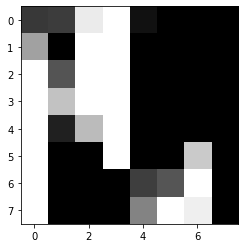

In [37]:
#Prewitt
c = 1
filter_prewitt_x = np.array([[-1, 0, 1], [-c, 0, c], [-1, 0, 1]])
print("Prewitt X:")
prewitt_x = convolution(image, filter_prewitt_x)
filter_prewitt_y = np.array([[-1, -c, -1], [0, 0, 0], [1, c, 1]])
print("\nPrewitt Y")
prewitt_x = convolution(image, filter_prewitt_y)
#Sobel
c = 2
filter_sobel_x = np.array([[-1, 0, 1], [-c, 0, c], [-1, 0, 1]])
print("\nSobel X:")
prewitt_x = convolution(image, filter_sobel_x)
filter_sobel_y = np.array([[-1, -c, -1], [0, 0, 0], [1, c, 1]])
print("\nSobel Y:")
prewitt_x = convolution(image, filter_sobel_x)

# Deuxième dérivé de l'image
Convolution avec l'opérateur Laplacien

Laplacian:
[[  69.   37. -156.  342. -456.  354. -558.  116.]
 [-131.   38.  357. -406.   -6. -277.  467. -373.]
 [ -45.   -4.  110. -138.  -64. -155.  311. -283.]
 [  16. -114.   19. -117.  -44.  -94.  -69.  -91.]
 [ -32. -114.  111. -171.  -98. -152.   33.  -51.]
 [ -51. -239.  382. -119. -218.   89.  385. -349.]
 [ -55. -209.   96.  268.  288.  144.  109. -306.]
 [-248. -346. -124. -233.  -45. -344. -262. -484.]]


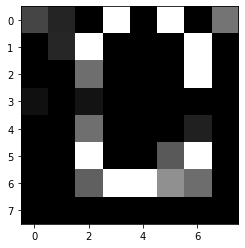

In [38]:
filter_laplacian = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
print("Laplacian:")
laplacian = convolution(image, filter_laplacian)

Filtre Moyen

[[ 11.222  18.444  40.889  81.444 102.556  96.667  74.222  45.889]
 [ 27.889  45.444  87.222 146.222 182.222 157.    124.222  70.667]
 [ 50.889  78.778 136.333 187.667 233.556 182.222 150.778  77.   ]
 [ 70.222 109.778 163.333 202.444 237.556 195.222 157.     82.333]
 [ 87.667 120.889 158.333 177.667 204.222 167.222 138.444  78.667]
 [100.222 125.333 131.222 117.333 131.778 112.333 117.667  78.111]
 [110.111 136.667 124.444  88.556  96.667  97.111 130.889  96.222]
 [ 76.     98.556  83.111  48.556  50.333  64.778  99.444  75.111]]


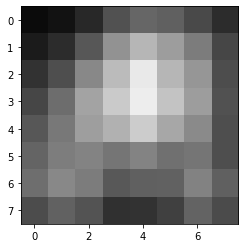

In [41]:
moyen_matrix = np.zeros([height, width])
padded = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, None, value=0)

for i in range(1, height+1):
  for j in range(1, width+1):
    moyen_matrix[i-1][j-1] = (padded[i-1][j-1] + padded[i-1][j] + padded[i-1][j+1] + padded[i][j-1] + padded[i][j] + padded[i][j+1] + padded[i+1][j-1] + padded[i+1][j] + padded[i+1][j+1]) / 9

print(moyen_matrix)
plt.imshow(moyen_matrix, cmap='gray')
plt.clim(0, 256)
plt.show()

Filtre Gaussien

Gaussian filter: 
[[  8.534  14.155  29.005  63.988  84.703  77.769  61.858  41.971]
 [ 24.115  33.471  62.552 118.956 151.099 123.222  91.278  61.961]
 [ 41.521  62.825  99.504 154.005 184.027 147.46  107.679  69.727]
 [ 56.046  90.387 123.66  164.61  187.905 158.647 119.001  72.759]
 [ 69.476 101.293 117.196 145.462 165.258 135.377 103.753  69.063]
 [ 80.421 104.948  92.748  94.179 106.111  86.06   81.678  70.836]
 [ 88.763 115.09   87.657  61.894  64.908  70.026  94.577  88.073]
 [ 67.499  90.814  71.915  46.283  46.279  62.989  88.412  75.491]]


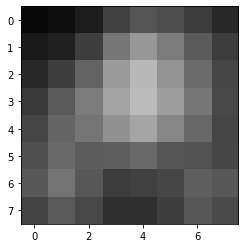

In [43]:
sigma = 1
filter_gaussian = []

for i in range(3):
    filter_gaussian.append([])
    for j in range(3):
      filter_gaussian[i].append(np.exp(-((i-1) ** 2 + (j-1) ** 2) / (2 * (sigma ** 2))) / (2* np.pi * (sigma ** 2)))

print("Gaussian filter: ")
gaussian = convolution(image, filter_gaussian)

Filtre médian

Median:
[[  0.  12.  12.  32.  53.  53.  53.   0.]
 [ 12.  53.  53. 190. 219. 190. 154.  53.]
 [ 57.  73. 146. 227. 235. 219. 154.  65.]
 [ 73.  97. 146. 239. 239. 227. 154. 117.]
 [ 97. 117. 146. 178. 231. 178. 130. 117.]
 [117. 117. 146. 117. 146.  93. 117.  85.]
 [130. 130. 130.  85.  93.  85. 166.  85.]
 [  0. 130.  73.  20.  20.  53.  85.   0.]]


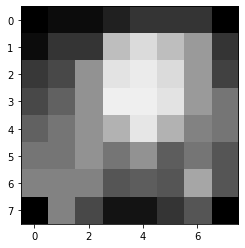

In [45]:
median_matrix = np.zeros([height, width])

for i in range(1, height+1):
  for j in range(1, width+1):
    temp = []
    temp.append(padded[i-1][j-1])
    temp.append(padded[i-1][j])
    temp.append(padded[i-1][j+1])
    temp.append(padded[i][j-1])
    temp.append(padded[i][j])
    temp.append(padded[i][j+1])
    temp.append(padded[i+1][j-1])
    temp.append(padded[i+1][j])
    temp.append(padded[i+1][j+1])
    temp.sort()
    median_matrix[i-1][j-1] = temp[4]

print("Median:")
print(median_matrix)
plt.imshow(median_matrix, cmap='gray')
plt.clim(0, 256)
plt.show()